In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline


import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

from keras import Sequential
from keras.layers import Dense

from PIL import Image
from time import time

from random import randint

from sklearn.preprocessing import LabelEncoder

# import os

# Import all data:
- __DATA_01/Images_01.npy__ : Images (2794, 224, 224, 3)
- __DATA_01/Labels_01.npy__ : Labels (2794, 1)

In [15]:
X_data = np.load('DATA_01/Images_01.npy')
y_data = np.load('DATA_01/Labels_01.npy')

print('X_data shape: %20s' % (str(X_data.shape)))
print('y_data shape: %20s' % (str(y_data.shape)))

X_data shape:  (2794, 224, 224, 3)
y_data shape:            (2794, 1)


In [16]:
classes_num = len(np.unique(y_data))
names, counts = np.unique(y_data, return_counts=True)

print(f'Found {len(X_data)} observations.')
print(f'Found {classes_num} unique classes.\n')
print('-'*48)
print('| %3s | %30s | %5s |' % ('IDX', 'LABEL', 'COUNT'))
print('-'*48)
for i, name in enumerate(names):
    print('| %3s | %30s | %5s |' % (i+1 , name, counts[i]))
print('-'*48)

Found 2794 observations.
Found 11 unique classes.

------------------------------------------------
| IDX |                          LABEL | COUNT |
------------------------------------------------
|   1 |                    apple_fruit |   248 |
|   2 |                  avocado_fruit |   249 |
|   3 |                         banana |   299 |
|   4 |             beetroot_vegetable |   250 |
|   5 |          bell_pepper_vegetable |   250 |
|   6 |             broccoli_vegetable |   250 |
|   7 |               carrot_vegetable |   249 |
|   8 |                    lemon_fruit |   250 |
|   9 |                   orange_fruit |   250 |
|  10 |            red_onion_vegetable |   250 |
|  11 |               strawberry_fruit |   249 |
------------------------------------------------


In [25]:
def print_images(images, labels, dim=(4, 4)):
    n = dim[0] * dim[1]
    
    assert len(images>=n) and len(images) == len(labels)
    
    indexes = []
    while len(indexes) < n:
        idx = randint(0, len(images))
        if idx not in indexes:
            indexes.append(idx)

    plt.figure(figsize=(10,10))
    
    for i, idx in enumerate(indexes):
        plt.subplot(dim[0], dim[1], i+1)
#         plt.subplots_adjust(hspace = 0.3)
        plt.imshow(images[idx])
        plt.title(f'{labels[idx]}\nidx: {idx}')
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

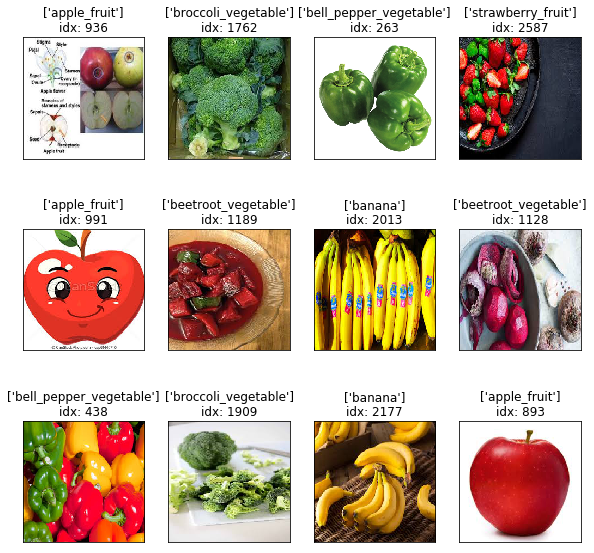

In [26]:
print_images(images=X_data,
             labels=y_data,
             dim=(3, 4))

### OneHotEncoder

In [27]:
# one_hot = pd.get_dummies(pd.Series(y_data.squeeze()))
# y_data_one_hot = one_hot.to_numpy()
# print('y_data_one_hot shape: %10s' % (str(y_data_one_hot.shape)))

### LabelEncoder

In [40]:
le = LabelEncoder()

le.fit(y_data.squeeze())
y_data_encoded = le.transform(y_data.squeeze())

y_data_encoded = y_data_encoded.reshape(len(y_data_encoded), 1)

for cls, encoded in zip(le.classes_, le.transform(le.classes_)):
    print('label %3s:  %s' % (encoded, cls))

label   0:  apple_fruit
label   1:  avocado_fruit
label   2:  banana
label   3:  beetroot_vegetable
label   4:  bell_pepper_vegetable
label   5:  broccoli_vegetable
label   6:  carrot_vegetable
label   7:  lemon_fruit
label   8:  orange_fruit
label   9:  red_onion_vegetable
label  10:  strawberry_fruit


In [41]:
print('y_data_encoded shape: %10s' % (str(y_data_encoded.shape)))

y_data_encoded shape:  (2794, 1)


In [43]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [82]:
def my_model(classes_num=classes_num):
    model = Sequential()
    
    model.add(Conv2D(filters = 32,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(224, 224, 3),))

    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=(2, 2)))
    
    model.add(Conv2D(filters = 64,
                     kernel_size=(3,3),
                     activation='relu'))
              
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=(2, 2)))
              
    
    model.add(Conv2D(filters = 128,
                     kernel_size=(3,3),
                     activation='relu'))
              
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=(2, 2)))

    model.add(Flatten())
    
#     model.add(Dense(units=100,
#                     activation='relu',))
    
    model.add(Dense(units=11,
                    activation='softmax',))
    
    return model

In [83]:
classes_num

11

In [84]:
my_model = my_model()

my_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 86528)            

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=13)

for i, data in enumerate([X_train, X_test, y_train, y_test]):
    name = ['X_train', 'X_test', 'y_train', 'y_test'][i]
    print('| %7s shape: %20s |' % (name, data.shape))

| X_train shape:  (2235, 224, 224, 3) |
|  X_test shape:   (559, 224, 224, 3) |
| y_train shape:            (2235, 1) |
|  y_test shape:             (559, 1) |


In [87]:
my_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
hist = my_model.fit(X_train,
                    y_train,
                    batch_size=30,
                    epochs=30)#,
#                     validation_split=0.2)

ValueError: Error when checking target: expected dense_12 to have shape (11,) but got array with shape (1,)

# MobileNet model

- MobileNet has been trained on the ImageNet dataset
- Excpects image with shape (224, 224, 3)
- ImageNet has 1001 different output classes

In [87]:
def MobileNet(IMAGE_RES=224):
    '''
    Full MobileNet_v2 model ready for classification.
    INPUT_SHAPE = (224, 224, 3)
    OUTPUT_SHAPE = (1001, 1)
    '''
    
    URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

    MobileNet = tf.keras.Sequential([
        hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
    ])
    
    return MobileNet

In [88]:
MobileNet=MobileNet()
MobileNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


### Get ImageNet's 1001 labels
- __ImageNet_labels.txt__ : Prepared txt file with all labels separated with '\n'
- You may find them online: https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

In [95]:
with open('ImageNet_labels.txt', 'r') as file:
    ImageNet_labels = file.read()
    ImageNet_labels = np.array(ImageNet_labels.split('\n')[:-1])

print(f'ImageNet_labels length: {len(ImageNet_labels)}')

ImageNet_labels length: 1001


### Predict

In [138]:
def predict(model, model_labels, single_image):
    '''
    Returns predicted label.
    Plot out image and top 3 most probable labels for provided image.
    '''
    
    print(f'Image shape: {single_image.shape}')
    
    # Requires batch > Create single image batch
    batch = single_image[np.newaxis, ...]
    print(f'ImageNet input final shape: {batch.shape}')
    
    # Make prediction
    prediction = MobileNet.predict(batch)
    print(f'ImageNet output final shape: {prediction.shape}')
    
    # Retrievie top 3 predicitons
    s = pd.Series(data=prediction.squeeze(),
                  index=model_labels)
    s = s.sort_values(ascending=False).iloc[:3]
    
    # Plot the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(single_image)
    plt.title(f'Prediction: {s.index[0]}')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 2, 2)
    plt.bar(x=s.index, height=s.values, )
    plt.title('Top3 labels probabilities')
    
    plt.suptitle("ImageNet_v2 original prediction.")
    plt.plot()
    
    return s.index[0]

Image shape: (224, 224, 3)
ImageNet input final shape: (1, 224, 224, 3)
ImageNet output final shape: (1, 1001)


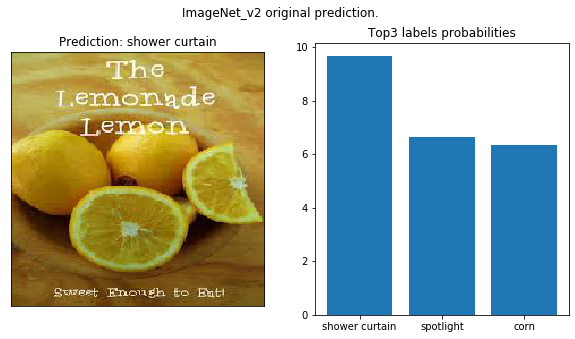

In [146]:
# Predict image file
label = predict(model=MobileNet,
                model_labels=ImageNet_labels,
                single_image=X_data[0])

# Transfer learning 
- mobilenet_v2 - feature_vector

In [1]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(224, 224,3))

# Do not want to change pre trained models weights
feature_extractor.trainable = False

NameError: name 'hub' is not defined

### 1280 is the number of neurons in the last layer of the partial model from TensorFlow Hub

In [148]:
transferedModel = tf.keras.Sequential([
    feature_extractor,
    layers.Dense(units=classes_num,
                 activation='softmax'),
])

transferedModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 11)                14091     
Total params: 2,272,075
Trainable params: 14,091
Non-trainable params: 2,257,984
_________________________________________________________________


### Compile

In [149]:
transferedModel.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [150]:
EPOCHS = 15

In [151]:
history = transferedModel.fit(x=X_data,
                              y=y_data_encoded,
                              epochs=EPOCHS,
                              validation_split=0.2,
                              verbose=1)

Train on 2235 samples, validate on 559 samples
Epoch 1/15
2235/2235 [==============================] - 87s 39ms/sample - loss: 2.2980 - accuracy: 0.2483 - val_loss: 2.4627 - val_accuracy: 0.0465
Epoch 2/15
2235/2235 [==============================] - 84s 38ms/sample - loss: 2.1762 - accuracy: 0.4089 - val_loss: 2.4550 - val_accuracy: 0.0662
Epoch 3/15
2235/2235 [==============================] - 87s 39ms/sample - loss: 2.1188 - accuracy: 0.4689 - val_loss: 2.4536 - val_accuracy: 0.0662
Epoch 4/15
2235/2235 [==============================] - 87s 39ms/sample - loss: 2.0670 - accuracy: 0.5280 - val_loss: 2.4455 - val_accuracy: 0.0716
Epoch 5/15
2235/2235 [==============================] - 74s 33ms/sample - loss: 2.0250 - accuracy: 0.5758 - val_loss: 2.4501 - val_accuracy: 0.0733
Epoch 6/15
2235/2235 [==============================] - 75s 34ms/sample - loss: 1.9960 - accuracy: 0.6103 - val_loss: 2.4520 - val_accuracy: 0.0680
Epoch 7/15
2235/2235 [==============================] - 74s 33ms/

### Plot the performance

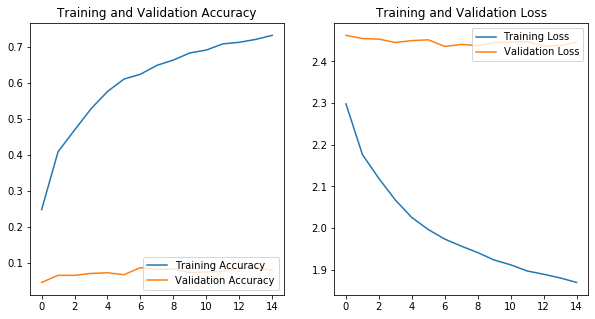

In [152]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [160]:
transferedModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 11)                14091     
Total params: 2,272,075
Trainable params: 14,091
Non-trainable params: 2,257,984
_________________________________________________________________


# TRAGIC PERFORMANCE..... val_accuracy: 0.0805?!